# Start

First Import all you will use

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             recall_score, precision_score, roc_curve, roc_auc_score)
from imblearn.over_sampling import SMOTE
from pylab import rcParams

In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 12
rcParams['figure.figsize'] = (5, 3)
rcParams['legend.fontsize'] = 8

warnings.filterwarnings("ignore")

In [ ]:
plt.rcParams['font.family'] = 'sans-serif' # Change the font family here

Let's import our data set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_2020_cleaned.csv to heart_2020_cleaned.csv


The data for the dataset came from Personal Key Indicators in Kaggle, which includes a number of risk factors and significant markers for heart disease, including high BMI (obesity), diabetes, smoking, and alcohol usage.

In [ ]:
heart_disease_df = pd.read_csv('heart_2020_cleaned.csv')
heart_disease_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Transform Data



Choose only the pertinent columns to reduce the data to those that have a substantial impact on the likelihood of heart disease before beginning the training procedure for our model.

In [ ]:
heart_disease_df_filtered = heart_disease_df[['HeartDisease', 'Sex', 'AgeCategory', 'Race', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Diabetic', 'PhysicalActivity', 'GenHealth']]
heart_disease_df_filtered

,HeartDisease,Sex,AgeCategory,Race,BMI,Smoking,AlcoholDrinking,Stroke,Diabetic,PhysicalActivity,GenHealth
0,No,Female,55-59,White,16.60,Yes,No,No,Yes,Yes,Very good
1,No,Female,80 or older,White,20.34,No,No,Yes,No,Yes,Very good
2,No,Male,65-69,White,26.58,Yes,No,No,Yes,Yes,Fair
3,No,Female,75-79,White,24.21,No,No,No,No,No,Good
4,No,Female,40-44,White,23.71,No,No,No,No,Yes,Very good
...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Male,60-64,Hispanic,27.41,Yes,No,No,Yes,No,Fair
319791,No,Male,35-39,Hispanic,29.84,Yes,No,No,No,Yes,Very good
319792,No,Female,45-49,Hispanic,24.24,No,No,No,No,Yes,Good
319793,No,Female,25-29,Hispanic,32.81,No,No,No,No,No,Good


In [ ]:
# Check for missing values in the filtered DataFrame
missing_values = heart_disease_df_filtered.isna().sum()
print (missing_values)

HeartDisease        0
Sex                 0
AgeCategory         0
Race                0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
Diabetic            0
PhysicalActivity    0
GenHealth           0
dtype: int64


There were no missing values

In [ ]:
heart_disease_df_filtered.groupby('HeartDisease').describe()

BMI                                                        
                 count       mean       std    min    25%    50%    75%    max
HeartDisease                                                                  
No            292422.0  28.224658  6.325660  12.02  23.89  27.26  31.32  94.85
Yes            27373.0  29.401592  6.577151  12.21  25.06  28.34  32.69  83.33

Verifying a Binary Target Variable
The HeartDisease column is the target variable, and it should only contain two distinct values, Yes and No.

# Data Analysis
We will analyse our filtered variables with various plots

<Axes: xlabel='HeartDisease', ylabel='count'>

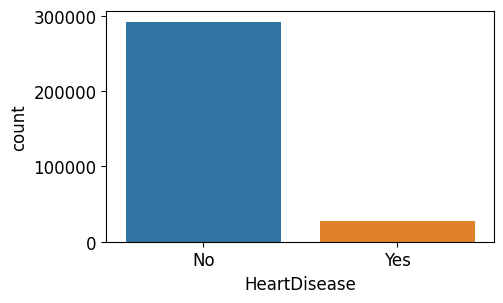

In [ ]:
sb.countplot(x='HeartDisease', data=heart_disease_df_filtered)

The number of heart disease records is not spread out evenly, which shows that people with and without the disease have different levels of knowledge. This might inject bias into the trained model's predictions of heart disease. We will apply SMOTE (Synthetic Minority Oversampling Method) to balance the class distribution in order to solve this problem. To achieve the best results, all categorical data must be transformed into binary using dummy variables before applying SMOTE. Starting with the nearest minority class data items, the SMOTE technique creates new combinations. This will be done in the next section

Investigative Study of Feature Variables
See BMI summary statistics belwo

In [ ]:
heart_disease_df_filtered.groupby('HeartDisease').describe()

BMI                                                        
                 count       mean       std    min    25%    50%    75%    max
HeartDisease                                                                  
No            292422.0  28.224658  6.325660  12.02  23.89  27.26  31.32  94.85
Yes            27373.0  29.401592  6.577151  12.21  25.06  28.34  32.69  83.33

Distribution according to sex

Text(0.5, 1.0, 'Distribution of Heart Disease Cases by Sex')

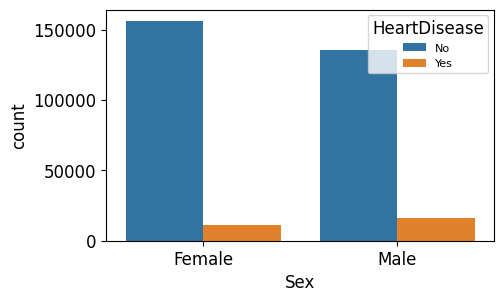

In [ ]:
# Data distribution of cases with Yes/No heart disease according to sex
sb.countplot(x=heart_disease_df_filtered['Sex'], hue='HeartDisease', data=heart_disease_df_filtered)
# Set the axis labels
ax.set_title('Distribution of Heart Disease Cases by Sex', fontsize=16)

Plot the data distribution of cases with Yes/No heart disease according to age category

an error just occured. I failed to define sns, so i will do that and re run the code

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

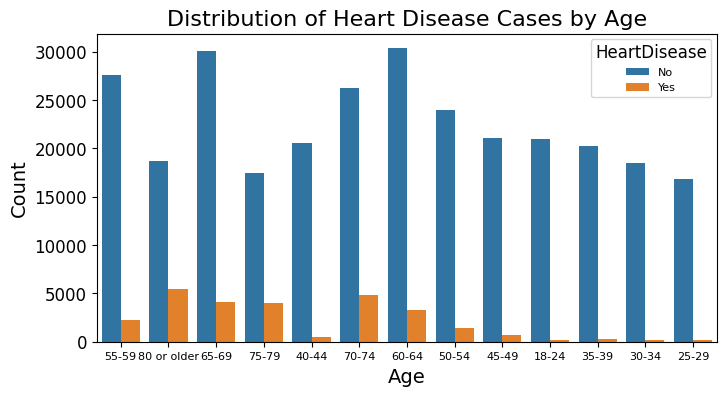

In [ ]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data distribution of cases with Yes/No heart disease according to age category
sns.countplot(x='AgeCategory', hue='HeartDisease', data=heart_disease_df_filtered, ax=ax)

# Set the axis labels
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Heart Disease Cases by Age', fontsize=16)

# Set the font size of the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

# Show the plot
plt.show()



Race-based data distribution of cases with heart disease: Yes/No. Our definition above solved the error

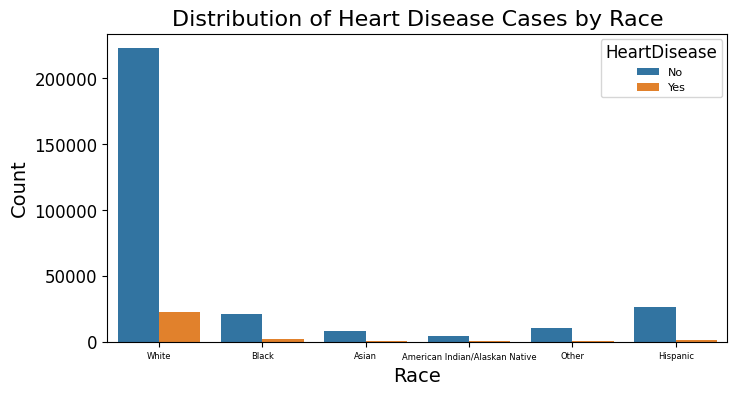

In [ ]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data distribution of cases with Yes/No heart disease according to age category
sns.countplot(x='Race', hue='HeartDisease', data=heart_disease_df_filtered, ax=ax)

# Set the axis labels
ax.set_xlabel('Race', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Heart Disease Cases by Race', fontsize=16)

# Set the font size of the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

# Show the plot
plt.show()


Distribution of instances with heart disease, Yes/No, based on smoking

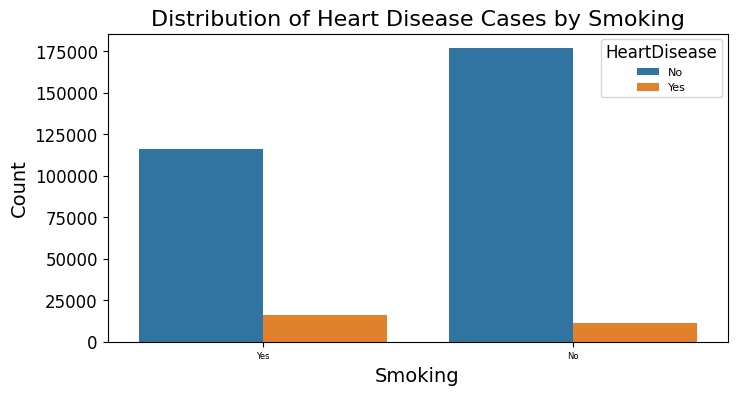

In [ ]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data distribution of cases with Yes/No heart disease according to age category
sns.countplot(x='Smoking', hue='HeartDisease', data=heart_disease_df_filtered, ax=ax)

# Set the axis labels
ax.set_xlabel('Smoking', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Heart Disease Cases by Smoking', fontsize=16)

# Set the font size of the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

# Show the plot
plt.show()

Distribution of instances with heart disease, Yes/No, based on been Diabetic

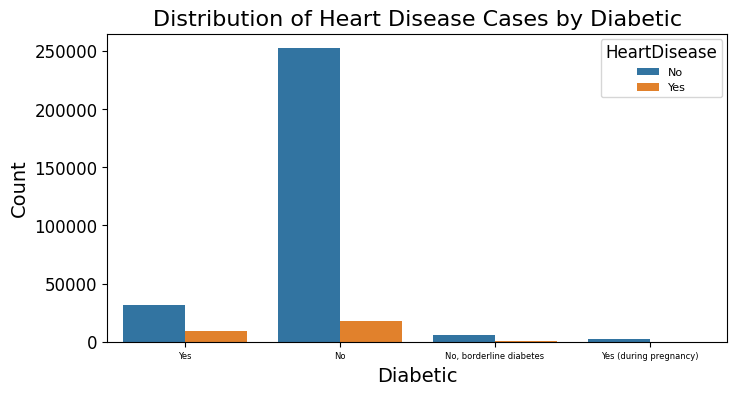

In [ ]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data distribution of cases with Yes/No heart disease according to age category
sns.countplot(x='Diabetic', hue='HeartDisease', data=heart_disease_df_filtered, ax=ax)

# Set the axis labels
ax.set_xlabel('Diabetic', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Heart Disease Cases by Diabetic', fontsize=16)

# Set the font size of the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

# Show the plot
plt.show()

Distribution of instances with heart disease, Yes/No, based on Physical Activity

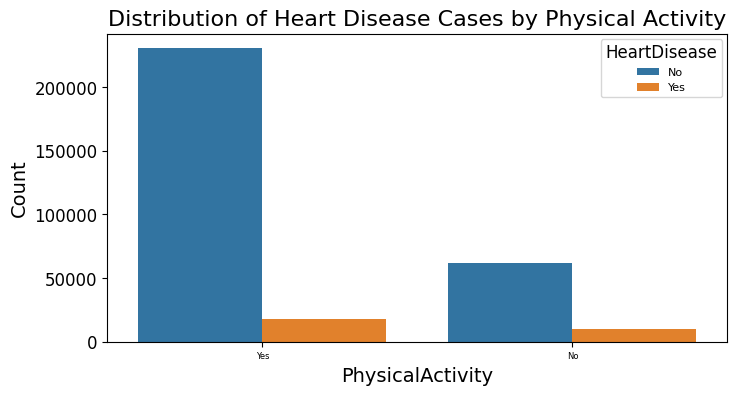

In [ ]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data distribution of cases with Yes/No heart disease according to age category
sns.countplot(x='PhysicalActivity', hue='HeartDisease', data=heart_disease_df_filtered, ax=ax)

# Set the axis labels
ax.set_xlabel('PhysicalActivity', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Heart Disease Cases by Physical Activity', fontsize=16)

# Set the font size of the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

# Show the plot
plt.show()

Distribution of instances with heart disease, Yes/No, based on General Health

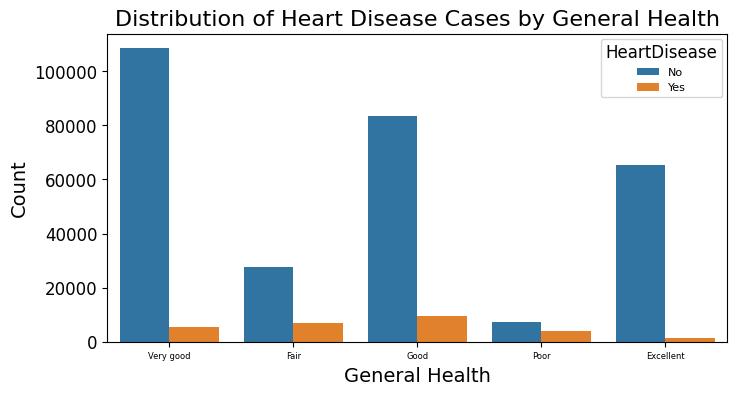

In [ ]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data distribution of cases with Yes/No heart disease according to age category
sns.countplot(x='GenHealth', hue='HeartDisease', data=heart_disease_df_filtered, ax=ax)

# Set the axis labels
ax.set_xlabel('General Health', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Heart Disease Cases by General Health', fontsize=16)

# Set the font size of the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

# Show the plot
plt.show()

Observations:

According to the data, heart disease becomes more common as people get older, which is consistent with the notion that growing older is a major risk factor for heart disease.
The statistics also indicate that in the sample group, people who identified as white had a greater prevalence of heart disease. This would suggest that in order to increase the analysis's representation of other racial groups, the sample group's racial mix needs to be more diverse.
The analysis also says that there isn't enough proof that drinking alcohol is a reliable way to predict heart disease. To reach any conclusions in this area, additional data collection and analysis may be required.

# Categorical Features to Dummy Indicator Conversion

In [ ]:
# Find categorical columns in the filtered heart disease DataFrame
categorical_columns = [col for col in heart_disease_df_filtered.columns if heart_disease_df_filtered[col].dtype == 'O']

# Print the number and names of the categorical columns
num_categorical_columns = len(categorical_columns)
print(f"There are {num_categorical_columns} categorical features:")
print(", ".join(categorical_columns))

There are 10 categorical features:
HeartDisease, Sex, AgeCategory, Race, Smoking, AlcoholDrinking, Stroke, Diabetic, PhysicalActivity, GenHealth


Create binary dummy variables with values of 0 (indicating No) or 1 for all categorical attributes (representing Yes).

In [ ]:
# Convert categorical attributes into binary dummy variables with 'No' represented by 0 and 'Yes' by 1.
# Identify categorical columns to be dropped after creating dummies.
categorical_drop_first = [name for name in categorical_columns if name not in ['AgeCategory', 'Race', 'GenHealth']]
# Identify categorical columns that should not be dropped after creating dummies.
categorical_no_drop = [name for name in categorical_columns if name in ['AgeCategory', 'Race', 'GenHealth']]

# Create dummy variables using Pandas' `get_dummies` function.
# Drop the first column for each categorical variable to avoid the dummy variable trap.
heart_disease_df_dummy = pd.get_dummies(data=heart_disease_df_filtered, columns=categorical_drop_first, drop_first=True)
heart_disease_df_dummy = pd.get_dummies(data=heart_disease_df_dummy, columns=categorical_no_drop)

# Preview the transformed data.
heart_disease_df_dummy.head(5)


,BMI,HeartDisease_Yes,Sex_Male,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,20.34,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,26.58,0,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,24.21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,23.71,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#After the conversion, the target features have expanded
#from the original 11 columns to a total of 34 columns.

heart_disease_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   HeartDisease_Yes                     319795 non-null  uint8  
 2   Sex_Male                             319795 non-null  uint8  
 3   Smoking_Yes                          319795 non-null  uint8  
 4   AlcoholDrinking_Yes                  319795 non-null  uint8  
 5   Stroke_Yes                           319795 non-null  uint8  
 6   Diabetic_No, borderline diabetes     319795 non-null  uint8  
 7   Diabetic_Yes                         319795 non-null  uint8  
 8   Diabetic_Yes (during pregnancy)      319795 non-null  uint8  
 9   PhysicalActivity_Yes                 319795 non-null  uint8  
 10  AgeCategory_18-24                    319795 non-null  uint8  
 11  AgeCategory_2

# K-Nearest Neighbor Value

As you create synthetic samples, choose the best k value to use for SMOTE's k-nearest neighbours.

In [ ]:
# Extract the features and target variables from the heart disease DataFrame
X = heart_disease_df_dummy.drop(['HeartDisease_Yes'], axis=1)
y = heart_disease_df_dummy['HeartDisease_Yes']

# Define a range of values for the number of neighbors parameter in KNN
param_grid = {'n_neighbors': [55, 60]}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Use grid search to find the best value of k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameter and score found by grid search
print(f"Best parameter: {grid_search.best_params_}")
print(f"Best score: {round(grid_search.best_score_, 2)}")


Best parameter: {'n_neighbors': 55}
Best score: 0.92


# Using SMOTE to Produce Synthetic Data

As previously mentioned, synthetic data will be produced using SMOTE in order to obtain a balanced distribution of data across all classes. The number to be utilised for k neighbors is 55 because it produced the best results for k-nearest neighbours during the hyperparameter tuning procedure.

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the oversampling method
oversample = SMOTE(k_neighbors=55, random_state=0)

# Print information about the oversampling method
print(f"Oversampling method: {oversample}")

Oversampling method: SMOTE(k_neighbors=55, random_state=0)


In [ ]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to a Pandas Series for easier handling
y_resampled = pd.Series(y_resampled)

# Display the number of records before and after SMOTE
print(f'Number of records before SMOTE:\n{y.value_counts()}\n')
print(f'Number of records after SMOTE:\n{y_resampled.value_counts()}')

Number of records before SMOTE:
0    292422
1     27373
Name: HeartDisease_Yes, dtype: int64

Number of records after SMOTE:
0    292422
1    292422
Name: HeartDisease_Yes, dtype: int64


# Test And Train

Split Data Into Training And Test Sets

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assume that X and y are the original features and target variable
smote = SMOTE(random_state=0)
X_features_smoted, y_target_smoted = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.3, random_state=0)

# Print the number of training and test datasets
num_train = X_train.shape[0]
num_test = X_test.shape[0]

print("Data Split:")
print("-----------")
print(f"Number of training datasets: {num_train}")
print(f"Number of test datasets: {num_test}")

Data Split:
-----------
Number of training datasets: 409390
Number of test datasets: 175454


# Let's Build A Model

The dataset is split into two sections, with 80% used to train a heart disease prediction algorithm. Logistic regression with built-in cross-validation is used to build the model.

In [ ]:
# Create a logistic regression model with cross-validation
logreg_model = LogisticRegressionCV(solver='lbfgs')

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Print the type of the trained model
print(f"The trained model is a {type(logreg_model).__name__}.")

The trained model is a LogisticRegressionCV.


Both the training set's and the test set's accuracy scores are fairly similar, at 0.8341 and 0.8325 respectively. Overfitting is therefore not supported by the data.

# Create Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(33,)), # input_shape is now (33,)
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate model on training dataset
train_accuracy = accuracy_score(y_train, model.predict(X_train).argmax(axis=-1))
print("Training Accuracy:", round(train_accuracy, 4))

# Evaluate model on testing dataset
test_accuracy = accuracy_score(y_test, model.predict(X_test).argmax(axis=-1))
print("Testing Accuracy:", round(test_accuracy, 4))

Epoch 1/10
12794/12794 [==============================] - 34s 3ms/step - loss: 0.4753 - accuracy: 0.7751 - val_loss: 0.4469 - val_accuracy: 0.7853
Epoch 2/10
12794/12794 [==============================] - 36s 3ms/step - loss: 0.4418 - accuracy: 0.7878 - val_loss: 0.4400 - val_accuracy: 0.7891
Epoch 3/10
12794/12794 [==============================] - 36s 3ms/step - loss: 0.4363 - accuracy: 0.7902 - val_loss: 0.4489 - val_accuracy: 0.7810
Epoch 4/10
12794/12794 [==============================] - 35s 3ms/step - loss: 0.4330 - accuracy: 0.7920 - val_loss: 0.4304 - val_accuracy: 0.7936
Epoch 5/10
12794/12794 [==============================] - 36s 3ms/step - loss: 0.4312 - accuracy: 0.7926 - val_loss: 0.4349 - val_accuracy: 0.7894
Epoch 6/10
12794/12794 [==============================] - 32s 3ms/step - loss: 0.4292 - accuracy: 0.7939 - val_loss: 0.4366 - val_accuracy: 0.7888
Epoch 7/10
12794/12794 [==============================] - 33s 3ms/step - loss: 0.4278 - accuracy: 0.7942 - val_loss: 0

# Evaluating the Model

To view the summary of prediction results and get a clear sense of the performance of the classification model, we will utilise the classification report and confusion matrix.

5483/5483 [==============================] - 8s 2ms/step
Classification Report of Test Dataset

              precision    recall  f1-score   support

           0       0.84      0.73      0.78     87481
           1       0.76      0.86      0.81     87973

    accuracy                           0.79    175454
   macro avg       0.80      0.79      0.79    175454
weighted avg       0.80      0.79      0.79    175454

Test Loss: 0.42666399478912354
Test Accuracy: 0.7945501208305359


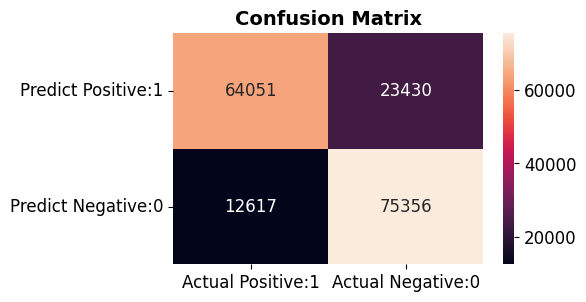

In [ ]:
# Get the test loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Predict on test data
y_pred_test = model.predict(X_test)

if y_pred_test.shape[1] > 1:
    y_pred_test_binary = y_pred_test.argmax(axis=1)
else:
    y_pred_test_binary = (y_pred_test > 0.5).astype(int)

print("Classification Report of Test Dataset\n")
print(classification_report(y_test, y_pred_test_binary))

cm = confusion_matrix(y_test, y_pred_test_binary)
TN, FP, FN, TP = cm.ravel()

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sb.heatmap(cm_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

The accuracy score of the developed model is 0.79, which represents the proportion of accurate predictions to overall predictions.

In [ ]:
total_samples_s = TP + TN + FP + FN
accuracy_score_s = (TP + TN) / total_samples_s
print(f"Accuracy score: {round(accuracy_score_s, 2)}")


Accuracy score: 0.79


In [ ]:
recall_s = TP / float(TP + FN)
recall_score_s = round(recall_s, 2)
print(f'Recall score: {recall_score_s}')

Recall score: 0.86


Recall score, which measures the percentage of actual positive instances that the model accurately detected out of all positive cases of heart disease, is 0.85.

ROC curve

5483/5483 [==============================] - 7s 1ms/step


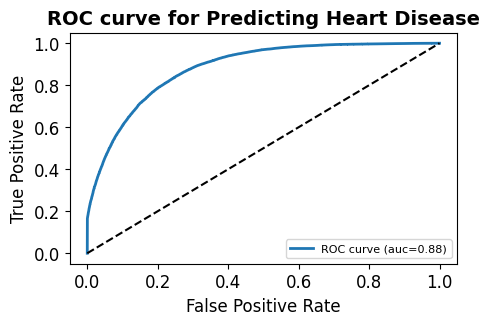

In [ ]:
# Predict outputs for test data using the trained model
y_pred_test = model.predict(X_test)

# Extract probabilities of positive class
y_prob_test = y_pred_test[:,1]

# Compute ROC curve values for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Compute AUC (Area Under the Curve) for ROC curve
auc = round(roc_auc_score(y_test, y_prob_test), 2)

# Plot ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC curve (auc=" + str(auc) + ")")
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Predicting Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


The well-balanced ROC (Receiver Operating Characteristics) curve shown indicates that the model does a decent job of differentiating between true positive and false positive heart disease instances. This finding is further backed up by the Area Under the Curve (AUC) score of 0.88. The ROC AUC score is higher because the ROC curve's placement near the top-left corner suggests a wider area under it. AUC of 1 would be attained by a perfect classifier, it is important to note.

# Predicting test results

Based on the patient's medical history, which is provided below, we will assess our model by using it to predict the probability that a patient would acquire heart disease.

In [ ]:
from enum import Enum

class Feature(Enum):

    BMI = 0
    Sex = 1
    Smoking = 2
    AlcoholDrinking = 3
    Stroke = 4
    DiabeticBorderline = 5
    Diabetic = 6
    DiabeticPregnancy= 7
    PhysicalActivity = 8
    AgeCategory_18_24 = 9
    AgeCategory_25_29 = 10
    AgeCategory_30_34 = 11
    AgeCategory_35_39 = 12
    AgeCategory_40_44 = 13
    AgeCategory_45_49 = 14
    AgeCategory_50_54 = 15
    AgeCategory_55_59 = 16
    AgeCategory_60_64 = 17
    AgeCategory_65_69 = 18
    AgeCategory_70_74 = 19
    AgeCategory_75_79 = 20
    AgeCategory_80_older = 21
    Race_American_Indian = 22
    Race_Asian = 23
    Race_Black = 24
    Race_Hispanic = 25
    Race_Other = 26
    Race_White = 27
    GenHealth_Excellent = 28
    GenHealth_Fair = 29
    GenHealth_Good = 30
    GenHealth_Poor = 31
    GenHealth_Very_Good = 32


def getPrediction(input_data):
    df = np.array(input_data).reshape(1,-1)
    return round(model.predict_proba(df)[0][1] * 100, 2)


def testPrediction(input_data):

    print("-----------------------------------------------------------")
    print("                   PATIENT'S RECORD                        ")
    print("-----------------------------------------------------------")
    for key, value in input_data.items():
        print(f"{key}: {value}")
    print("-----------------------------------------------------------")

    upd_input_data = [0] * (heart_disease_df_dummy.columns.size - 1)

    upd_input_data[Feature.BMI.value] = input_data['BMI']
    upd_input_data[Feature.Sex.value] = 1 if input_data['Sex'].lower()  == 'male' else 0
    upd_input_data[Feature.AlcoholDrinking.value] = 1 if input_data['Alcohol Drinking'].lower() == 'yes' else 0
    upd_input_data[Feature.PhysicalActivity.value] = 1 if input_data['Physical Activity'].lower()  == 'yes' else 0
    upd_input_data[Feature.Smoking.value] = 1 if input_data['Smoking'].lower()  == 'yes' else 0
    upd_input_data[Feature.Stroke.value] = 1 if input_data['Stroke'].lower()  == 'yes' else 0


    race = input_data['Race'].lower()
    if race in ['american indian', 'alaskan native']:
        upd_input_data[Feature.Race_American_Indian.value] = 1
    elif race == 'asian':
        upd_input_data[Feature.Race_Asian.value] = 1
    elif race == 'black':
        upd_input_data[Feature.Race_Black.value] = 1
    elif race == 'hispanic':
        upd_input_data[Feature.Race_Hispanic.value] = 1
    elif race == 'white':
        upd_input_data[Feature.Race_White.value] = 1
    elif race == 'other':
        upd_input_data[Feature.Race_Other.value] = 1


    age = input_data['Age']
    if 18 >= age <= 24:
        upd_input_data[Feature.AgeCategory_18_24.value] = 1
    elif 25 >= age <= 29:
        upd_input_data[Feature.AgeCategory_25_29.value] = 1
    elif 30 >= age <= 34:
        upd_input_data[Feature.AgeCategory_30_34.value] = 1
    elif 35 >= age <= 39:
        upd_input_data[Feature.AgeCategory_35_39.value] = 1
    elif 40 >= age <= 44:
        upd_input_data[Feature.AgeCategory_40_44.value] = 1
    elif 45 >= age <= 49:
        upd_input_data[Feature.AgeCategory_45_49.value] = 1
    elif 50 >= age <= 54:
        upd_input_data[Feature.AgeCategory_50_54.value] = 1
    elif 55 >= age <= 59:
        upd_input_data[Feature.AgeCategory_55_59.value] = 1
    elif 60 >= age <= 64:
        upd_input_data[Feature.AgeCategory_60_64.value] = 1
    elif 65 >= age <= 69:
        upd_input_data[Feature.AgeCategory_65_69.value] = 1
    elif 70 >= age <= 74:
        upd_input_data[Feature.AgeCategory_70_74.value] = 1
    elif 75 >= age <= 79:
        upd_input_data[Feature.AgeCategory_75_79.value] = 1
    elif age >= 80:
        upd_input_data[Feature.AgeCategory_80_older.value] = 1


    diabetic = input_data['Diabetic'].lower()
    if diabetic  == 'yes':
        upd_input_data[Feature.Diabetic.value] = 1
    elif diabetic.endswith("borderline"):
        upd_input_data[Feature.DiabeticBorderline.value] = 1
    elif diabetic.endswith("during pregnancy"):
        upd_input_data[Feature.DiabeticPregnancy.value] = 1


    general_health = input_data['General Health'].lower()
    if general_health == 'poor':
        upd_input_data[Feature.GenHealth_Poor.value] = 1
    elif general_health == 'fair':
        upd_input_data[Feature.GenHealth_Fair.value] = 1
    elif general_health == 'good':
        upd_input_data[Feature.GenHealth_Good.value] = 1
    elif general_health == 'very good':
        upd_input_data[Feature.GenHealth_Very_Good.value] = 1
    elif general_health == 'excellent':
        upd_input_data[Feature.GenHealth_Excellent.value] = 1


    prediction = getPrediction(upd_input_data)
    print(f"\nThe probability of {input_data['Name']} developing heart disease is {prediction}%")

In [ ]:
def getPrediction(input_data):
    df = np.array(input_data).reshape(1,-1)
    return round(model.predict(df)[0][0] * 100, 2)

Test Data #1

In [ ]:
test_data = {
    'Name' : 'Janet Calvin',
    'Sex' : 'Female',
    'Age' : 35,
    'Race' : 'White',
    'BMI' : 21.6,
    'Smoking' : 'No',
    'Alcohol Drinking' : 'No',
    'Stroke' : 'No',
    'Diabetic' : 'No',
    'Physical Activity' : 'Yes',
    'General Health' : 'Good'
}

testPrediction(test_data)

-----------------------------------------------------------
                   PATIENT'S RECORD                        
-----------------------------------------------------------
Name: Janet Calvin
Sex: Female
Age: 35
Race: White
BMI: 21.6
Smoking: No
Alcohol Drinking: No
Stroke: No
Diabetic: No
Physical Activity: Yes
General Health: Good
-----------------------------------------------------------
1/1 [==============================] - 0s 58ms/step

The probability of Janet Calvin developing heart disease is 89.96%


Test Data #2

In [ ]:
test_data = {
    'Name' : 'Gabriel Lockes',
    'Sex' : 'Male',
    'Age' : 60,
    'Race' : 'Hispanic',
    'BMI' : 40.6,
    'Smoking' : 'Yes',
    'Alcohol Drinking' : 'Yes',
    'Stroke' : 'No',
    'Diabetic' : 'No',
    'Physical Activity' : 'Yes',
    'General Health' : 'Good'
}

testPrediction(test_data)

-----------------------------------------------------------
                   PATIENT'S RECORD                        
-----------------------------------------------------------
Name: Gabriel Lockes
Sex: Male
Age: 60
Race: Hispanic
BMI: 40.6
Smoking: Yes
Alcohol Drinking: Yes
Stroke: No
Diabetic: No
Physical Activity: Yes
General Health: Good
-----------------------------------------------------------
1/1 [==============================] - 0s 26ms/step

The probability of Gabriel Lockes developing heart disease is 94.14%


Test Data #3

In [ ]:
input_data = {
    'Name' : 'Justina Bervely',
    'Sex' : 'Female',
    'Age' : 80,
    'Race' : 'American_Indian',
    'BMI' : 94.6,
    'Smoking' : 'Yes',
    'Alcohol Drinking' : 'Yes',
    'Stroke' : 'Yes',
    'Diabetic' : 'Yes',
    'Physical Activity' : 'No',
    'General Health' : 'Poor'
}

testPrediction(input_data)

-----------------------------------------------------------
                   PATIENT'S RECORD                        
-----------------------------------------------------------
Name: Justina Bervely
Sex: Female
Age: 80
Race: American_Indian
BMI: 94.6
Smoking: Yes
Alcohol Drinking: Yes
Stroke: Yes
Diabetic: Yes
Physical Activity: No
General Health: Poor
-----------------------------------------------------------
1/1 [==============================] - 0s 32ms/step

The probability of Justina Bervely developing heart disease is 0.01%


Test Data #4

In [ ]:
input_data = {
    'Name' : 'Alfred Gomez',
    'Sex' : 'Male',
    'Age' : 70,
    'Race' : 'Other',
    'BMI' : 94.6,
    'Smoking' : 'Yes',
    'Alcohol Drinking' : 'Yes',
    'Stroke' : 'No',
    'Diabetic' : 'Yes',
    'Physical Activity' : 'No',
    'General Health' : 'Poor'
}

testPrediction(input_data)

-----------------------------------------------------------
                   PATIENT'S RECORD                        
-----------------------------------------------------------
Name: Alfred Gomez
Sex: Male
Age: 70
Race: Other
BMI: 94.6
Smoking: Yes
Alcohol Drinking: Yes
Stroke: No
Diabetic: Yes
Physical Activity: No
General Health: Poor
-----------------------------------------------------------
1/1 [==============================] - 0s 24ms/step

The probability of Alfred Gomez developing heart disease is 92.81%
